In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

## Cargar dataset y dividir en 40% train 40% validation y 20% test

In [157]:
# Cargar dataset
datos = pd.read_csv('Valhalla23.csv')

# Definir semilla
semilla = 2992
random.seed(semilla)

# Dividir en subsets
X = datos[['Celsius']]
y = datos['Valks']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=semilla)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=semilla)

## Modelo base

In [158]:
# Se crea el objeto del modelo y se entrena
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(max_iter= 10000000, eta0 = 1e-5, random_state = semilla)
model.fit(X_train, y_train)

SGDRegressor(eta0=1e-05, max_iter=10000000, random_state=2992)

### Error cuadratico medio

In [159]:
from sklearn.metrics import mean_squared_error

# Error de datos de entrenamiento 
y_train_pred = model.predict(X_train)
MSE_train = mean_squared_error(y_train, y_train_pred)
print('MSE train=', MSE_train)

# Error de datos de validacion 
y_val_pred = model.predict(X_val)
MSE_val = mean_squared_error(y_val, y_val_pred)
print('MSE val=', MSE_val)

# Error de datos de entrenamiento 
y_test_pred = model.predict(X_test)
MSE_test = mean_squared_error(y_test, y_test_pred)
print('MSE test=', MSE_test)

MSE train= 312.1807635456691
MSE val= 294.09158284711873
MSE test= 346.70891566076


### Gráfica

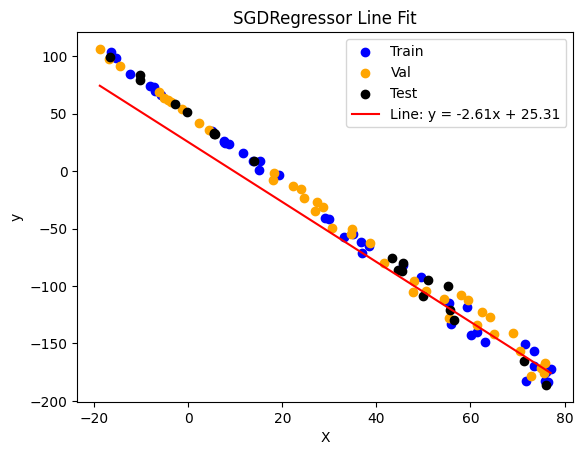

In [160]:
# Crear los datos para la recta
slope = model.coef_[0]
intercept = model.intercept_[0]
X_plot = np.linspace(X.min(), X.max(), 100)  # 100 points for a smooth line
y_plot = slope * X_plot + intercept

# Graficar los datos
plt.scatter(X_train, y_train, color='blue', label='Train')
plt.scatter(X_val, y_val, color='orange', label='Val')
plt.scatter(X_test, y_test, color='black', label='Test')

# Graficar la recta
plt.plot(X_plot, y_plot, color='red', label=f'Line: y = {slope:.2f}x + {intercept:.2f}')

plt.xlabel('X')
plt.ylabel('y')
plt.title('SGDRegressor Line Fit')
plt.legend()

plt.show()

## Prueba con múltiples modelos

In [161]:
cant_datos = np.linspace(2, 39, 20).astype(int)
errores_train_prom = []
errores_val_prom = []
errores_train_std = []
errores_val_std = []

train_index = list(X_train.index)
val_index = list(X_val.index)

for i in cant_datos:
    errores_train = np.zeros(100)
    errores_val = np.zeros(100)
    
    for k in range(100):
        # Selección aleatoria de índices
        train_index_i = random.sample(range(len(X_train)), i)
        val_index_i = random.sample(range(len(X_val)), i)
        
        # Crear subconjuntos de entrenamiento y validación
        X_train_i = X_train.iloc[train_index_i]
        y_train_i = y_train.iloc[train_index_i]
        X_val_i = X_val.iloc[val_index_i]
        y_val_i = y_val.iloc[val_index_i]

        model = SGDRegressor(max_iter=1000000, eta0=1e-5, random_state=semilla)
        model.fit(X_train_i, y_train_i)

        # Predecir en el subconjunto de entrenamiento y validación
        y_train_pred = model.predict(X_train_i)
        y_val_pred = model.predict(X_val_i)
        
        # Calcular el error cuadrático medio
        errores_train[k] = mean_squared_error(y_train_i, y_train_pred)
        errores_val[k] = mean_squared_error(y_val_i, y_val_pred)
    
    # Promedio y desviación estándar de los errores
    errores_train_prom.append(np.mean(errores_train))
    errores_val_prom.append(np.mean(errores_val))
    errores_train_std.append(np.std(errores_train))
    errores_val_std.append(np.std(errores_val))

# Agregar errores base
errores_train_prom.append(MSE_train)
errores_val_prom.append(MSE_val)
errores_train_std.append(np.std([MSE_train]))  # Desviación estándar para un solo valor es 0
errores_val_std.append(np.std([MSE_val]))      # Desviación estándar para un solo valor es 0

# Crear un DataFrame con los resultados
resultados = pd.DataFrame({
    'Subconjunto': cant_datos.tolist() + ['Línea base'],
    'Error_Entrenamiento': errores_train_prom,
    'Error_Validacion': errores_val_prom,
    'Desviacion_Estandar_Entrenamiento': errores_train_std,
    'Desviacion_Estandar_Validacion': errores_val_std
})

print(resultados)

   Subconjunto  Error_Entrenamiento  Error_Validacion  \
0            2           673.908970       7338.445538   
1            3           814.814926       1992.225940   
2            5           818.032639        963.816739   
3            7           779.183996        841.775851   
4            9           715.118946        783.584345   
5           11           669.391856        681.049893   
6           13           630.840943        635.125032   
7           15           585.096147        596.873313   
8           17           544.287520        537.651859   
9           19           511.528599        517.071899   
10          21           477.681321        457.118672   
11          23           452.261375        438.933801   
12          25           429.005269        409.614136   
13          27           405.353686        389.756658   
14          29           384.211019        361.545744   
15          31           371.929536        354.425524   
16          33           353.74

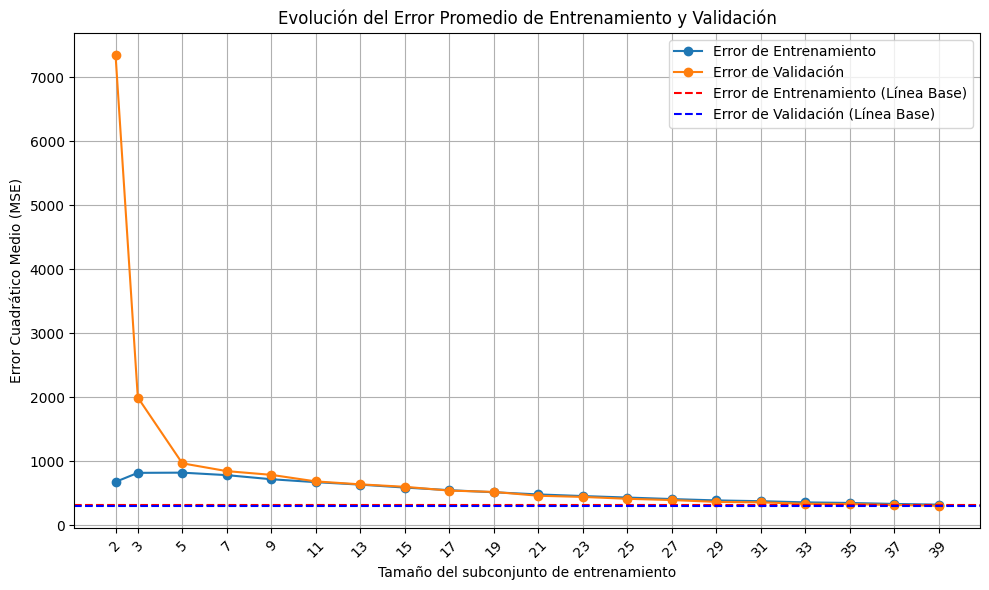

In [162]:
# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar los errores de entrenamiento
plt.plot(cant_datos, errores_train_prom[:-1], label='Error de Entrenamiento', marker='o')

# Graficar los errores de validación
plt.plot(cant_datos, errores_val_prom[:-1], label='Error de Validación', marker='o')

# Graficar los errores de la línea base
plt.axhline(y=errores_train_prom[-1], color='r', linestyle='--', label='Error de Entrenamiento (Línea Base)')
plt.axhline(y=errores_val_prom[-1], color='b', linestyle='--', label='Error de Validación (Línea Base)')

# Añadir etiquetas y leyenda
plt.xlabel('Tamaño del subconjunto de entrenamiento')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Evolución del Error Promedio de Entrenamiento y Validación')
plt.legend()
plt.grid(True)
plt.xticks(cant_datos, rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

### Ajustes obtenidos

En el caso del modelo que utiliza 2 elementos para entrenar se tiene un modelo con underfit, puesto que el error es demasiado grande y no logra hacer predicciones adecuadamente. Por otro lado, el modelo que utiliza los 40 elementos para entrenar es el que tiene menos error, por lo que este tiene un fit adecuado. Además, los modelos que tienen menos elementos dependen mucho más de los números aleatorios, por ello la desviación estándar de los errores es mucho más grande comparado con los casos que tienen más elementos para entrenamiento. 